In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [3]:
x_train = pd.read_csv(r'C:\Users\sdf\Desktop\M_DSBD_S3\Deep Learning\TP\tp_ArabicCharacters_CNN\csvTrainImages 13440x1024.csv',header=None)
y_train = pd.read_csv(r'C:\Users\sdf\Desktop\M_DSBD_S3\Deep Learning\TP\tp_ArabicCharacters_CNN\csvTrainLabel 13440x1.csv',header=None)

x_test = pd.read_csv(r'C:\Users\sdf\Desktop\M_DSBD_S3\Deep Learning\TP\tp_ArabicCharacters_CNN\csvTestImages 3360x1024.csv',header=None)
y_test = pd.read_csv(r'C:\Users\sdf\Desktop\M_DSBD_S3\Deep Learning\TP\tp_ArabicCharacters_CNN\csvTestLabel 3360x1.csv',header=None)

In [4]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()-1

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()-1

In [5]:
print('Train Data Size',x_train.shape,y_train.shape)
print('Test Data Size',x_test.shape,y_test.shape)

Train Data Size (13440, 1024) (13440, 1)
Test Data Size (3360, 1024) (3360, 1)


In [6]:
x_train = x_train.reshape(-1,32,32)
x_test = x_test.reshape(-1,32,32)
x_train = x_train/255
x_test = x_test/255
# for some reason the images are flipped and rotated
# so we transpose each image to be in the correct shape
x_train = np.array([image.T for image in x_train])
x_test = np.array([image.T for image in x_test])

# shuffle
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

print(x_train.shape, x_test.shape)

(13440, 32, 32) (3360, 32, 32)


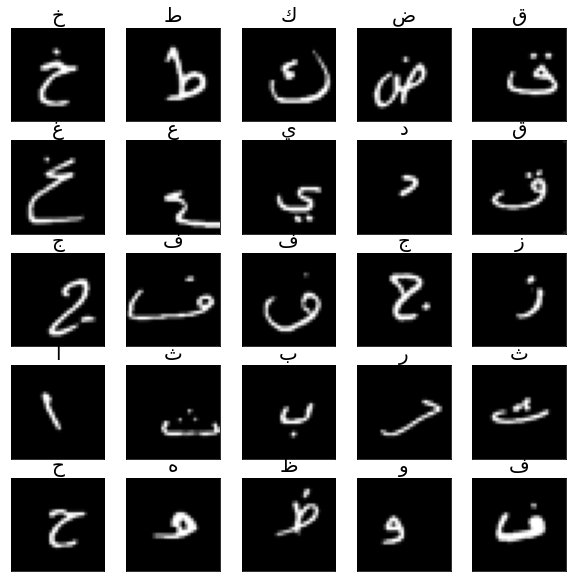

In [7]:
# set the arabic alphabet
arabic_chars =list('ابتثجحخدذرزسشصضطظعغفقكلمنهوي')
arabic_chars

ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32),"gray")
    plt.title(arabic_chars[int(y_train[ra[i]][0])], fontsize = 20)
plt.show()

In [8]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

y_train_h = to_categorical(y_train)
y_test_h = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train_h.shape, y_test_h.shape)

(13440,) (3360,)
(13440, 28) (3360, 28)


In [9]:
x_train = x_train.reshape(-1,32,32, 1)
x_test = x_test.reshape(-1,32,32, 1)

train_datagen=ImageDataGenerator(
    #rescale=1/255, # Normalize the new images
    zoom_range=0.2, #the amount of zooming u need
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1, #Shear angle in counter-clockwise direction in degrees
    fill_mode='nearest',
#     rotation_range=20, 
)

train_generator=train_datagen.flow(
    x_train ,y_train ,batch_size=64
)
test_datagen=ImageDataGenerator()

test_generator=test_datagen.flow(
    x_test ,y_test ,batch_size=64
 
)

In [10]:
earlystop = EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience= 3,
    verbose=1,
)
callbacks = [earlystop, learning_rate_reduction]

In [11]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(256,(5,5),activation='relu',input_shape=(32,32,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128,(5,5),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(28, kernel_regularizer=keras.regularizers.l2(0.01) ,activation='softmax'))

In [12]:
model.compile(optimizer= 'adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 256)       6656      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       819328    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 128)         0         
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [15]:
model.fit(
    train_generator, 
    epochs=100,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/100
210/210 [==============================] - 151s 721ms/step - loss: 1.8723 - accuracy: 0.4742 - val_loss: 0.7752 - val_accuracy: 0.7961 - lr: 0.0010
Epoch 2/100
210/210 [==============================] - 120s 570ms/step - loss: 1.0157 - accuracy: 0.7119 - val_loss: 0.5479 - val_accuracy: 0.8708 - lr: 0.0010
Epoch 3/100
210/210 [==============================] - 121s 576ms/step - loss: 0.7964 - accuracy: 0.7806 - val_loss: 0.4835 - val_accuracy: 0.8932 - lr: 0.0010
Epoch 4/100
210/210 [==============================] - 121s 576ms/step - loss: 0.6642 - accuracy: 0.8237 - val_loss: 0.3730 - val_accuracy: 0.9217 - lr: 0.0010
Epoch 5/100
210/210 [==============================] - 120s 571ms/step - loss: 0.5850 - accuracy: 0.8464 - val_loss: 0.3160 - val_accuracy: 0.9378 - lr: 0.0010
Epoch 6/100
210/210 [==============================] - 121s 575ms/step - loss: 0.5123 - accuracy: 0.8686 - val_loss: 0.3148 - val_accuracy: 0.9304 - lr: 0.0010
Epoch 7/100
210/210 [===================

210/210 [==============================] - 137s 650ms/step - loss: 0.2748 - accuracy: 0.9333 - val_loss: 0.1744 - val_accuracy: 0.9711 - lr: 0.0010
Epoch 22/100
210/210 [==============================] - 134s 640ms/step - loss: 0.2786 - accuracy: 0.9347 - val_loss: 0.1804 - val_accuracy: 0.9714 - lr: 0.0010
Epoch 23/100
210/210 [==============================] - 135s 643ms/step - loss: 0.2677 - accuracy: 0.9409 - val_loss: 0.1762 - val_accuracy: 0.9711 - lr: 0.0010
Epoch 24/100
210/210 [==============================] - 135s 641ms/step - loss: 0.2672 - accuracy: 0.9394 - val_loss: 0.1900 - val_accuracy: 0.9673 - lr: 0.0010
Epoch 25/100
210/210 [==============================] - 138s 656ms/step - loss: 0.2537 - accuracy: 0.9411 - val_loss: 0.1761 - val_accuracy: 0.9702 - lr: 0.0010
Epoch 26/100
210/210 [==============================] - 181s 865ms/step - loss: 0.2568 - accuracy: 0.9400 - val_loss: 0.1776 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 27/100
210/210 [=========================

<AxesSubplot:>

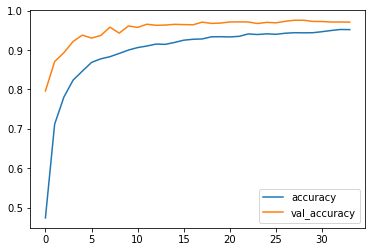

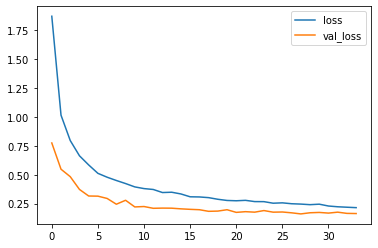

In [16]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [17]:
model.evaluate(test_generator)

53/53 [==============================] - 9s 169ms/step - loss: 0.1643 - accuracy: 0.9708


[0.16426531970500946, 0.9708333611488342]

In [18]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred)

105/105 [==============================] - 10s 90ms/step
[26 21  8 ... 19 15 15]


Text(0.5, 1.0, 'ك')

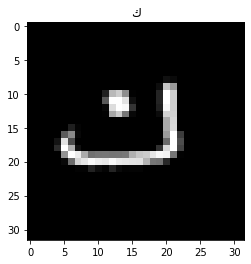

In [22]:
plt.imshow(x_test[15].reshape(32,32),"gray")
plt.title(arabic_chars[pred[15]])

In [20]:
model.save('arabic_alphabet_model.h5')